### CLASSIFIER COMPARISON

XLM_RoBERTa:

In [1]:
import pandas as pd
from utils import compute_metrics, distr
from plots import stats_plot, distr_plot

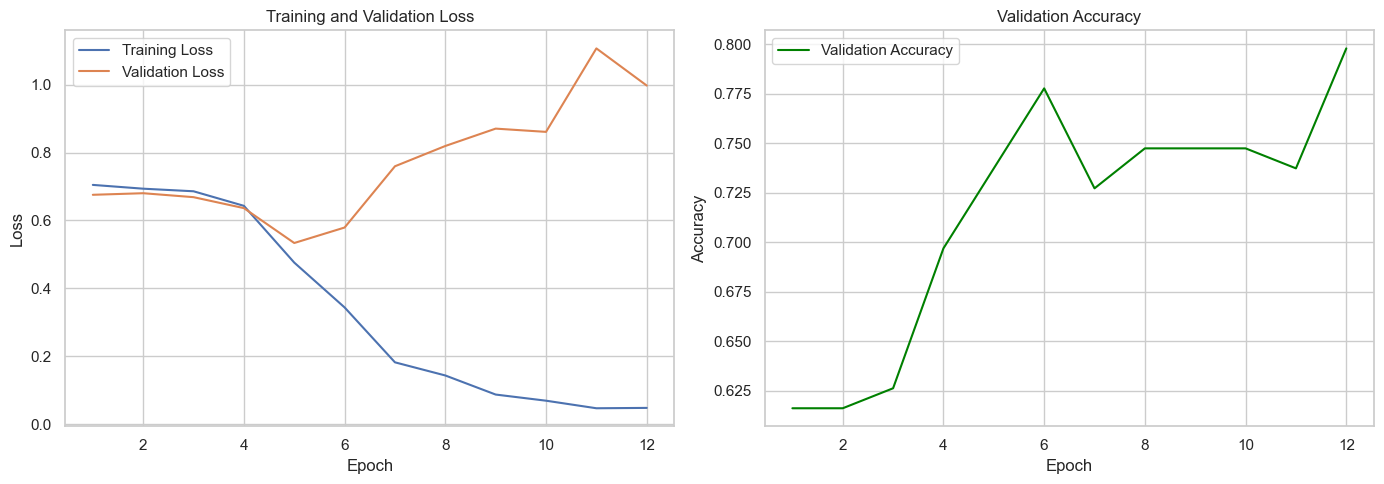

In [2]:
xlmrobertastats = pd.read_csv('../XML-RoBERTa_epoch_stats_2024-04-11-04-29.csv')

stats_plot(xlmrobertastats)

Distribution between classes:
0: 67
1: 32


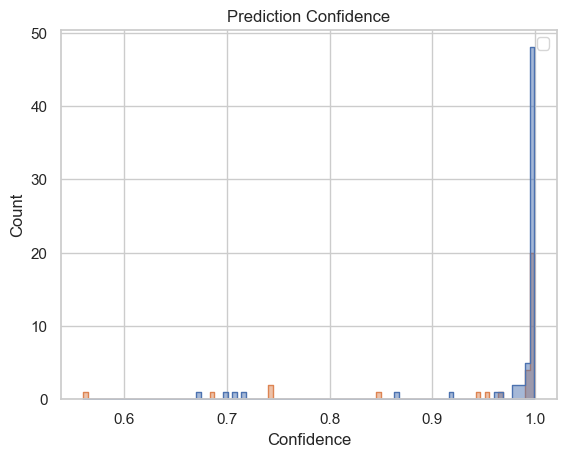

In [3]:
xlmrobertavalpreds = pd.read_csv('../validation_conf_test_2024-04-11-15-58.csv')

distr(xlmrobertavalpreds)
distr_plot(xlmrobertavalpreds)

In [4]:
compute_metrics(xlmrobertavalpreds, 0)
compute_metrics(xlmrobertavalpreds, 0.995)

Sample Size: 99/99
F1 Score: 0.7143 ± 0.0890
Precision: 0.7812 ± 0.0814
Accuracy: 0.7980 ± 0.0791

Threshold 0.995:
Sample Size: 67/99
F1 Score: 0.7805 ± 0.0991
Precision: 0.8000 ± 0.0958
Accuracy: 0.8657 ± 0.0817



In [10]:
seconds = 24432.21
print(f'Train time: {round(seconds/60/60, 2)}h')

Train time: 6.79h


BERT Base Multilingual:

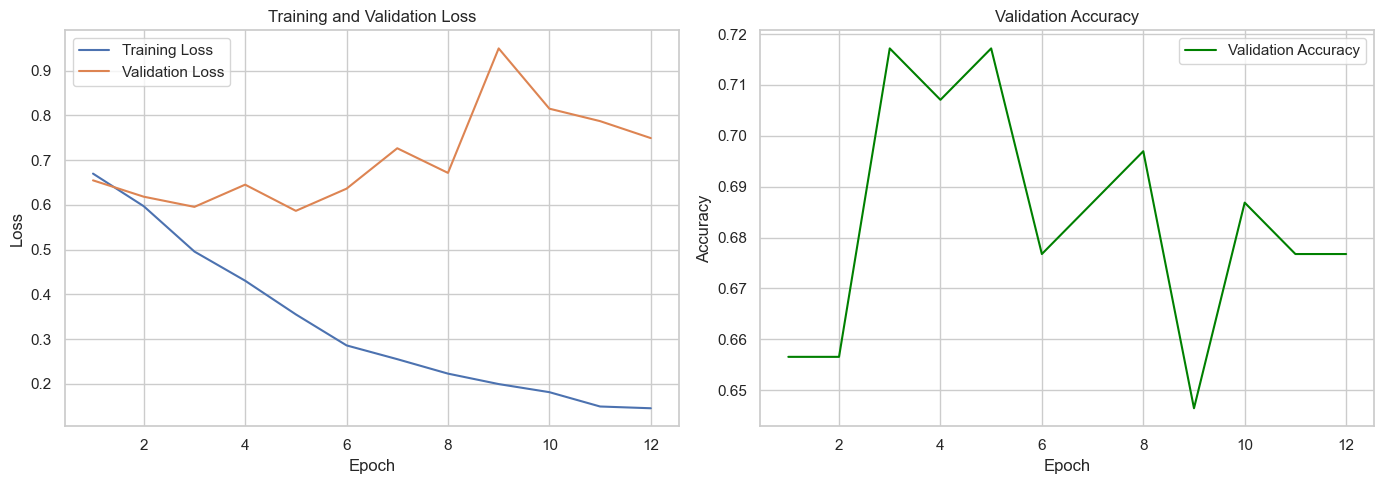

In [25]:
bertstats = pd.read_csv('../mBERT_epoch_stats_2024-04-27-20-50.csv')

stats_plot(bertstats)

Distribution between classes:
1: 49
0: 50


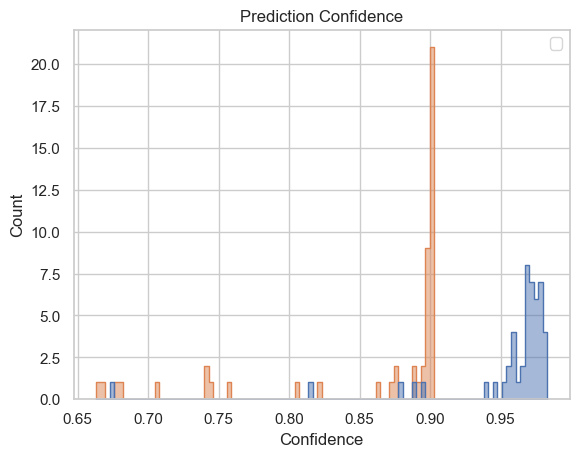

In [26]:
bertvalpreds = pd.read_csv('../mBERT_validation_predictions_with_confidence_2024-04-27-20-50.csv')

bertvalpreds = pd.merge(bertvalpreds, xlmrobertavalpreds, on='EstText Index', how='inner')[['EstText Index', 'True Label', 'Label', 'Confidence_x']]
bertvalpreds = bertvalpreds.rename(columns={'Label': 'Prediction', 'Confidence_x': 'Confidence'})

distr(bertvalpreds)
distr_plot(bertvalpreds)

In [30]:
compute_metrics(bertvalpreds, 0)
compute_metrics(bertvalpreds, 0.9)

Sample Size: 99/99
F1 Score: 0.6364 ± 0.0948
Precision: 0.5600 ± 0.0978
Accuracy: 0.6768 ± 0.0921

Threshold 0.9:
Sample Size: 60/99
F1 Score: 0.5455 ± 0.1260
Precision: 0.5625 ± 0.1255
Accuracy: 0.7500 ± 0.1096



In [12]:
seconds = 6483.48
print(f'Train time: {round(seconds/60/60, 2)}h')

Train time: 1.8h


ELECTRA:

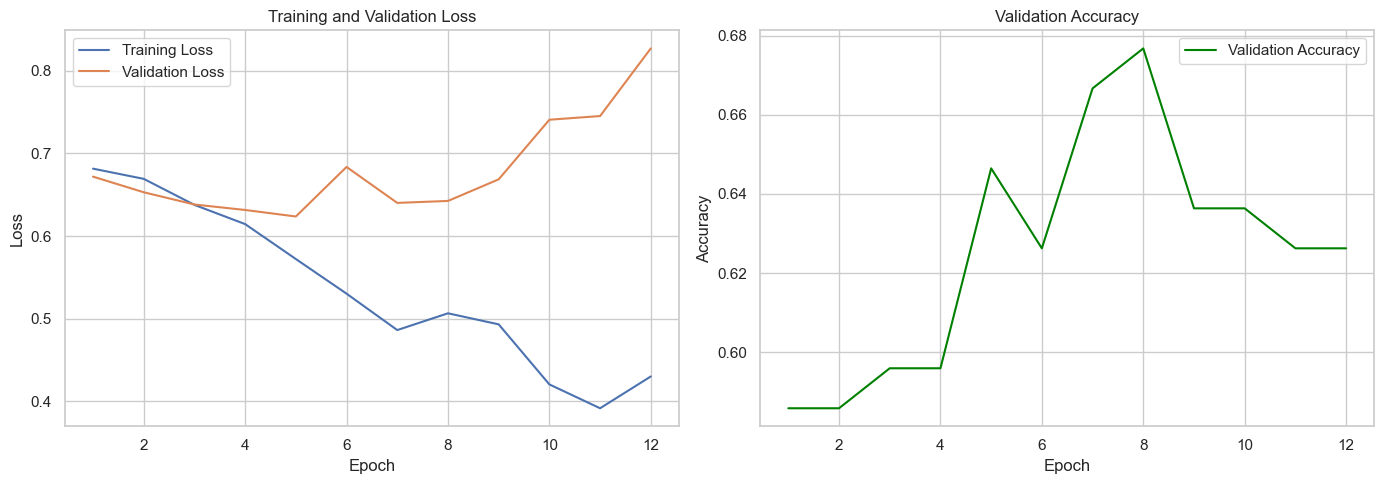

In [31]:
electrastats = pd.read_csv('../ELECTRA_epoch_stats_2024-04-27-21-16.csv')

stats_plot(electrastats)

Distribution between classes:
0: 92
1: 7


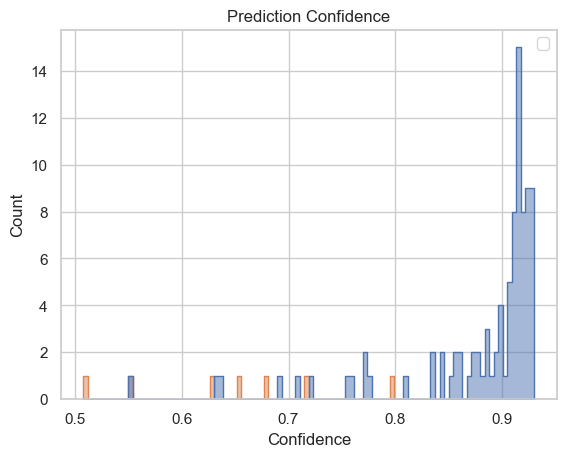

In [33]:
electravalpreds = pd.read_csv('../ELECTRA_validation_predictions_with_confidence_2024-04-27-21-16.csv')

electravalpreds = pd.merge(electravalpreds, xlmrobertavalpreds, on='EstText Index', how='inner')[['EstText Index', 'True Label', 'Label', 'Confidence_x']]
electravalpreds = electravalpreds.rename(columns={'Label': 'Prediction', 'Confidence_x': 'Confidence'})

distr(electravalpreds)
distr_plot(electravalpreds)

In [36]:
compute_metrics(electravalpreds, 0)
compute_metrics(electravalpreds, 0.75)

Sample Size: 99/99
F1 Score: 0.1778 ± 0.0753
Precision: 0.5714 ± 0.0975
Accuracy: 0.6263 ± 0.0953

Threshold 0.75:
Sample Size: 87/99
F1 Score: 0.0625 ± 0.0509
Precision: 1.0000 ± 0.0000
Accuracy: 0.6552 ± 0.0999



In [13]:
seconds = 7959.77
print(f'Train time: {round(seconds/60/60, 2)}h')

Train time: 2.21h
